In [44]:
import pandas as pd
import numpy
import shap
import joblib

from sklearn.model_selection import train_test_split

In [45]:
file = 'X_sin_Row_StandardScaler.csv'

X = pd.read_csv('../data/processed/' + file)
z = pd.read_csv('../data/processed/y.csv')

X.drop(columns=X.columns[0], axis=1, inplace=True)
y = X['yield']
X.drop(columns='yield', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [46]:
m = joblib.load('../models/WildBlueberryYieldPrediction.joblib')
m

LinearRegression()

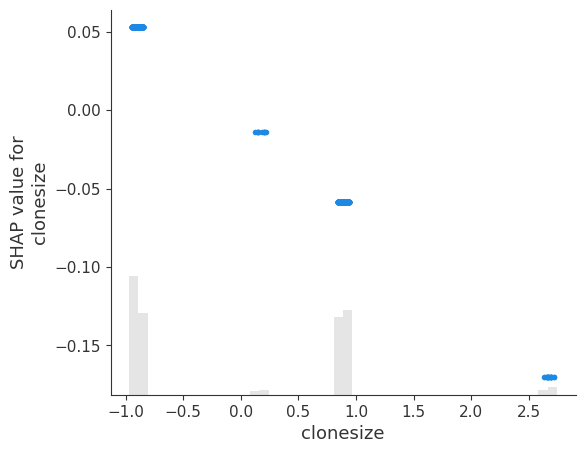

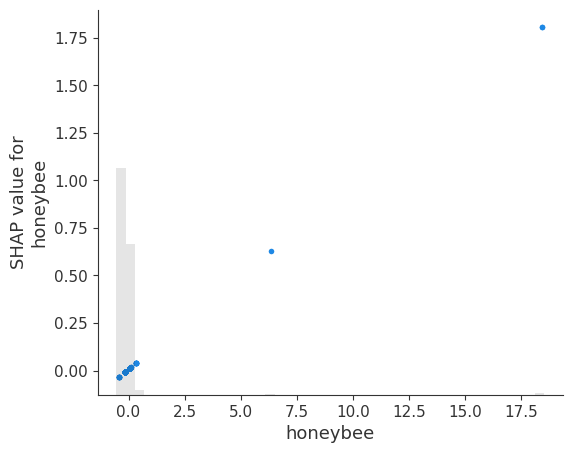

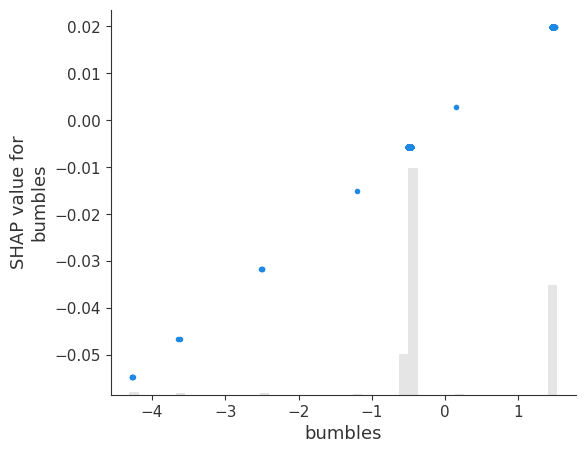

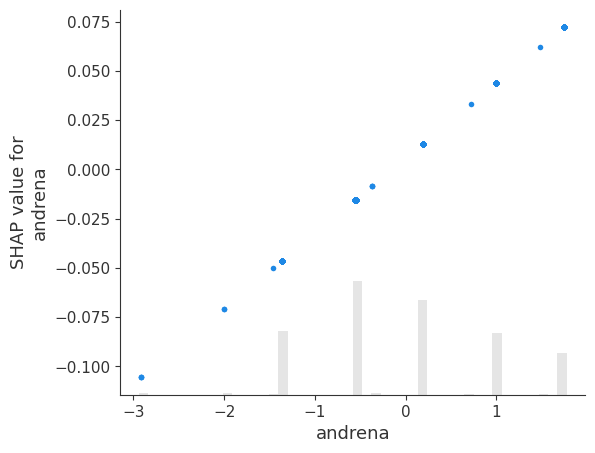

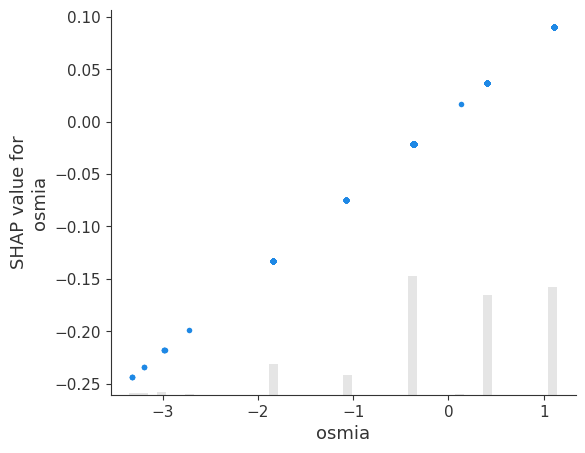

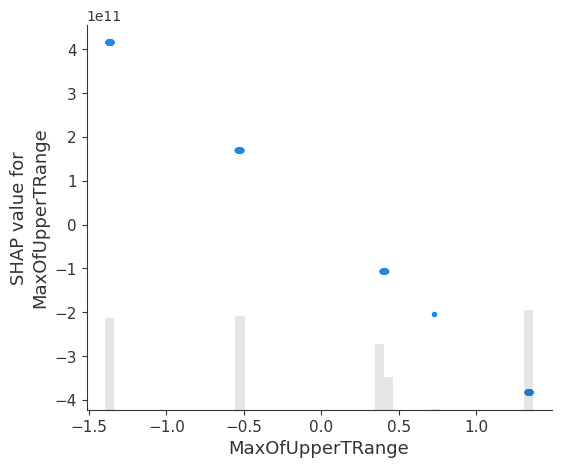

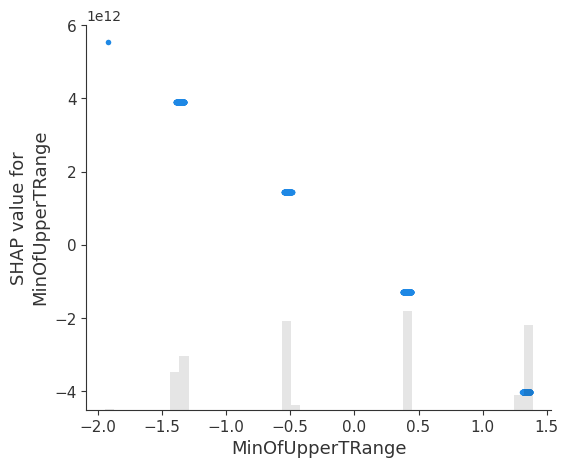

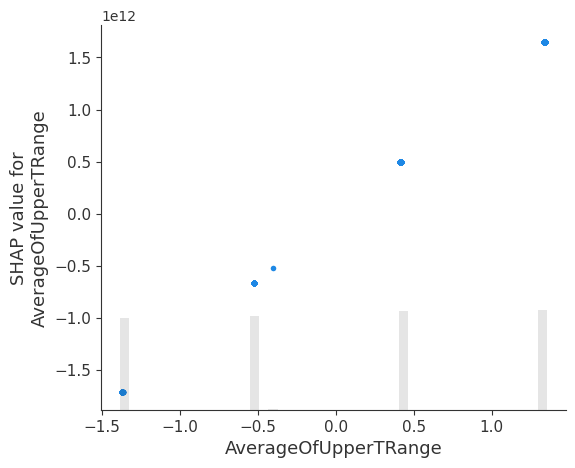

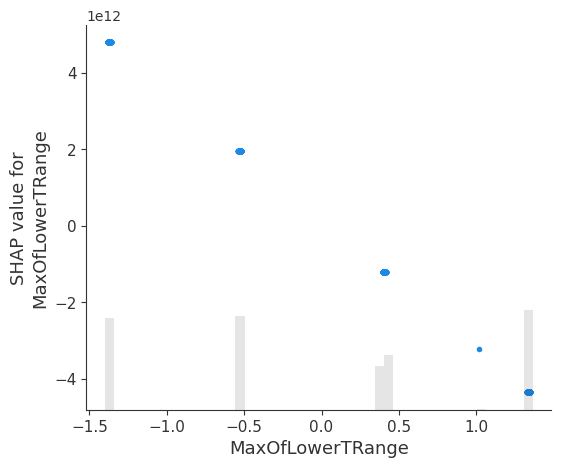

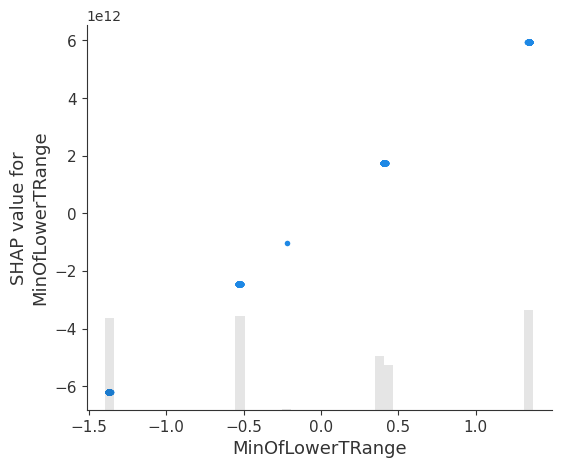

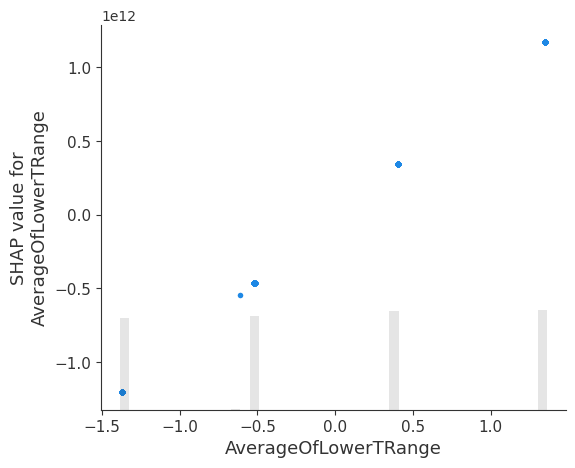

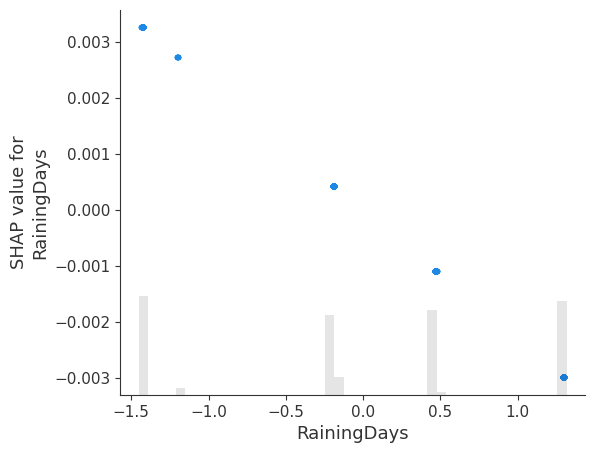

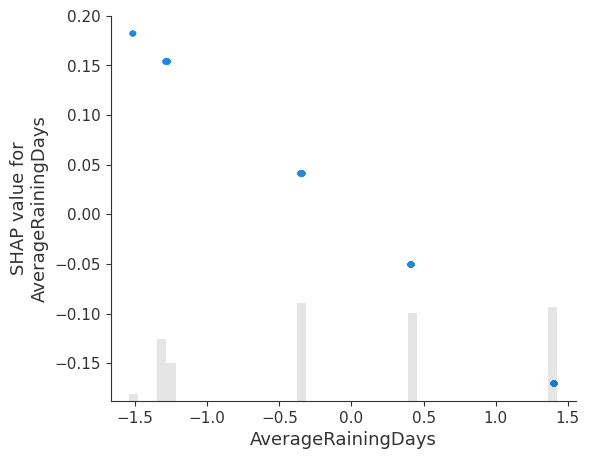

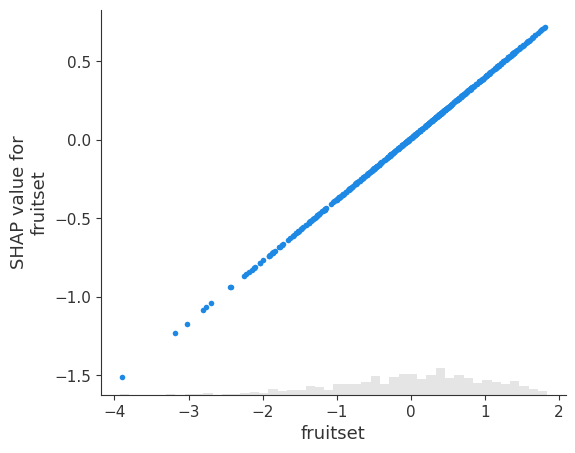

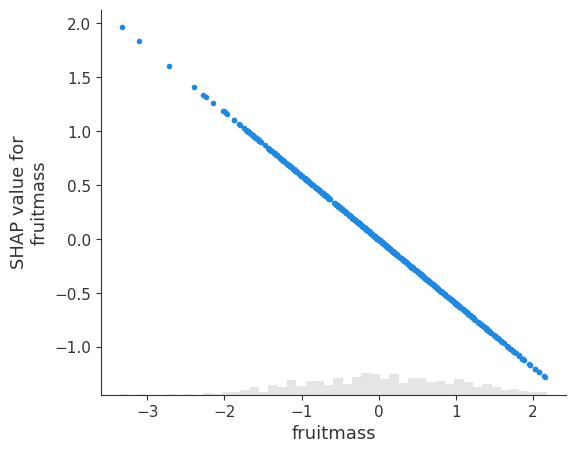

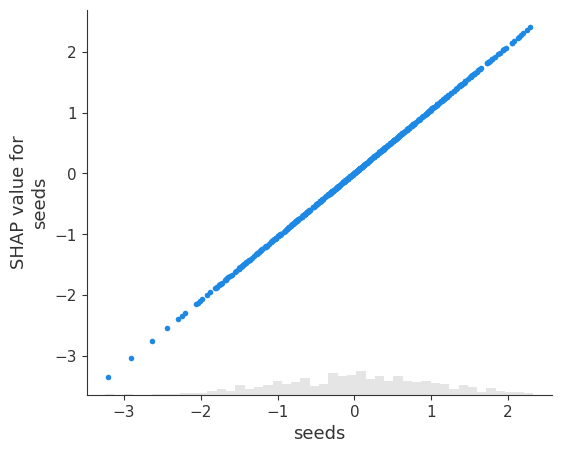

In [47]:
explainer = shap.explainers.Linear(m, X_train)
shap_values = explainer(X_train)

for i,c in enumerate(X.columns):
    shap.plots.scatter(shap_values[:, i])   
